EDA PIPELINE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib


In [2]:
df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset
df

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Legion\AppData\Local\Temp\ipykernel_11160\247879204.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv('Process_data\diabetes_final_standardized.csv')  # Load the dataset


age    gender  alcohol_consumption_per_week  \
0      0.504956  0.895204                     -1.413253   
1     -0.135884 -0.961951                     -0.707921   
2      0.633124  0.895204                     -0.707921   
3      1.530299 -0.961951                     -1.413253   
4     -0.264052  0.895204                     -0.707921   
...         ...       ...                           ...   
99995 -0.264052  0.895204                     -0.707921   
99996 -0.584472 -0.961951                      0.702744   
99997  0.440872 -0.961951                      1.408076   
99998 -0.199968 -0.961951                      0.702744   
99999  0.120452 -0.961951                     -0.707921   

       physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                1.138363   -0.165523             0.824199   
1                                0.285376    0.395977            -0.454787   
2                               -0.733470    0.227527             2.742678   
3                               -0.828246   -1.456972            -0.363431   
4                               -0.117424    0.676727             0.367418   
...                                   ...         ...                  ...   
99995                            0.202447    1.294376            -0.546144   
99996                           -0.508376    1.575126            -0.180719   
99997                            0.024741    2.192775            -1.825130   
99998                           -0.792705   -0.053223            -0.272075   
99999                            1.529316   -1.850021            -1.459705   

       screen_time_hours_per_day  family_history_diabetes  \
0                       0.771162                -0.530172   
1                       1.095260                -0.530172   
2                       0.852187                 1.886181   
3                      -0.322667                -0.530172   
4                      -0.403691                -0.530172   
...                          ...                      ...   
99995                  -0.606252                -0.530172   
99996                  -0.484715                -0.530172   
99997                   0.041943                -0.530172   
99998                  -2.226739                -0.530172   
99999                  -0.201130                -0.530172   

       hypertension_history  cardiovascular_history  ...  \
0                 -0.578582               -0.293278  ...   
1                 -0.578582               -0.293278  ...   
2                 -0.578582               -0.293278  ...   
3                 -0.578582               -0.293278  ...   
4                 -0.578582               -0.293278  ...   
...                     ...                     ...  ...   
99995             -0.578582               -0.293278  ...   
99996             -0.578582               -0.293278  ...   
99997             -0.578582                3.409731  ...   
99998              1.728364               -0.293278  ...   
99999             -0.578582               -0.293278  ...   

       employment_status_Student  employment_status_Unemployed  \
0                          False                         False   
1                          False                         False   
2                          False                          True   
3                          False                         False   
4                          False                         False   
...                          ...                           ...   
99995                      False                          True   
99996                      False                         False   
99997                      False                         False   
99998                      False                         False   
99999                      False                         False   

       smoking_status_Former  smoking_status_Never  bmi_category_Obese  \
0                      False                 

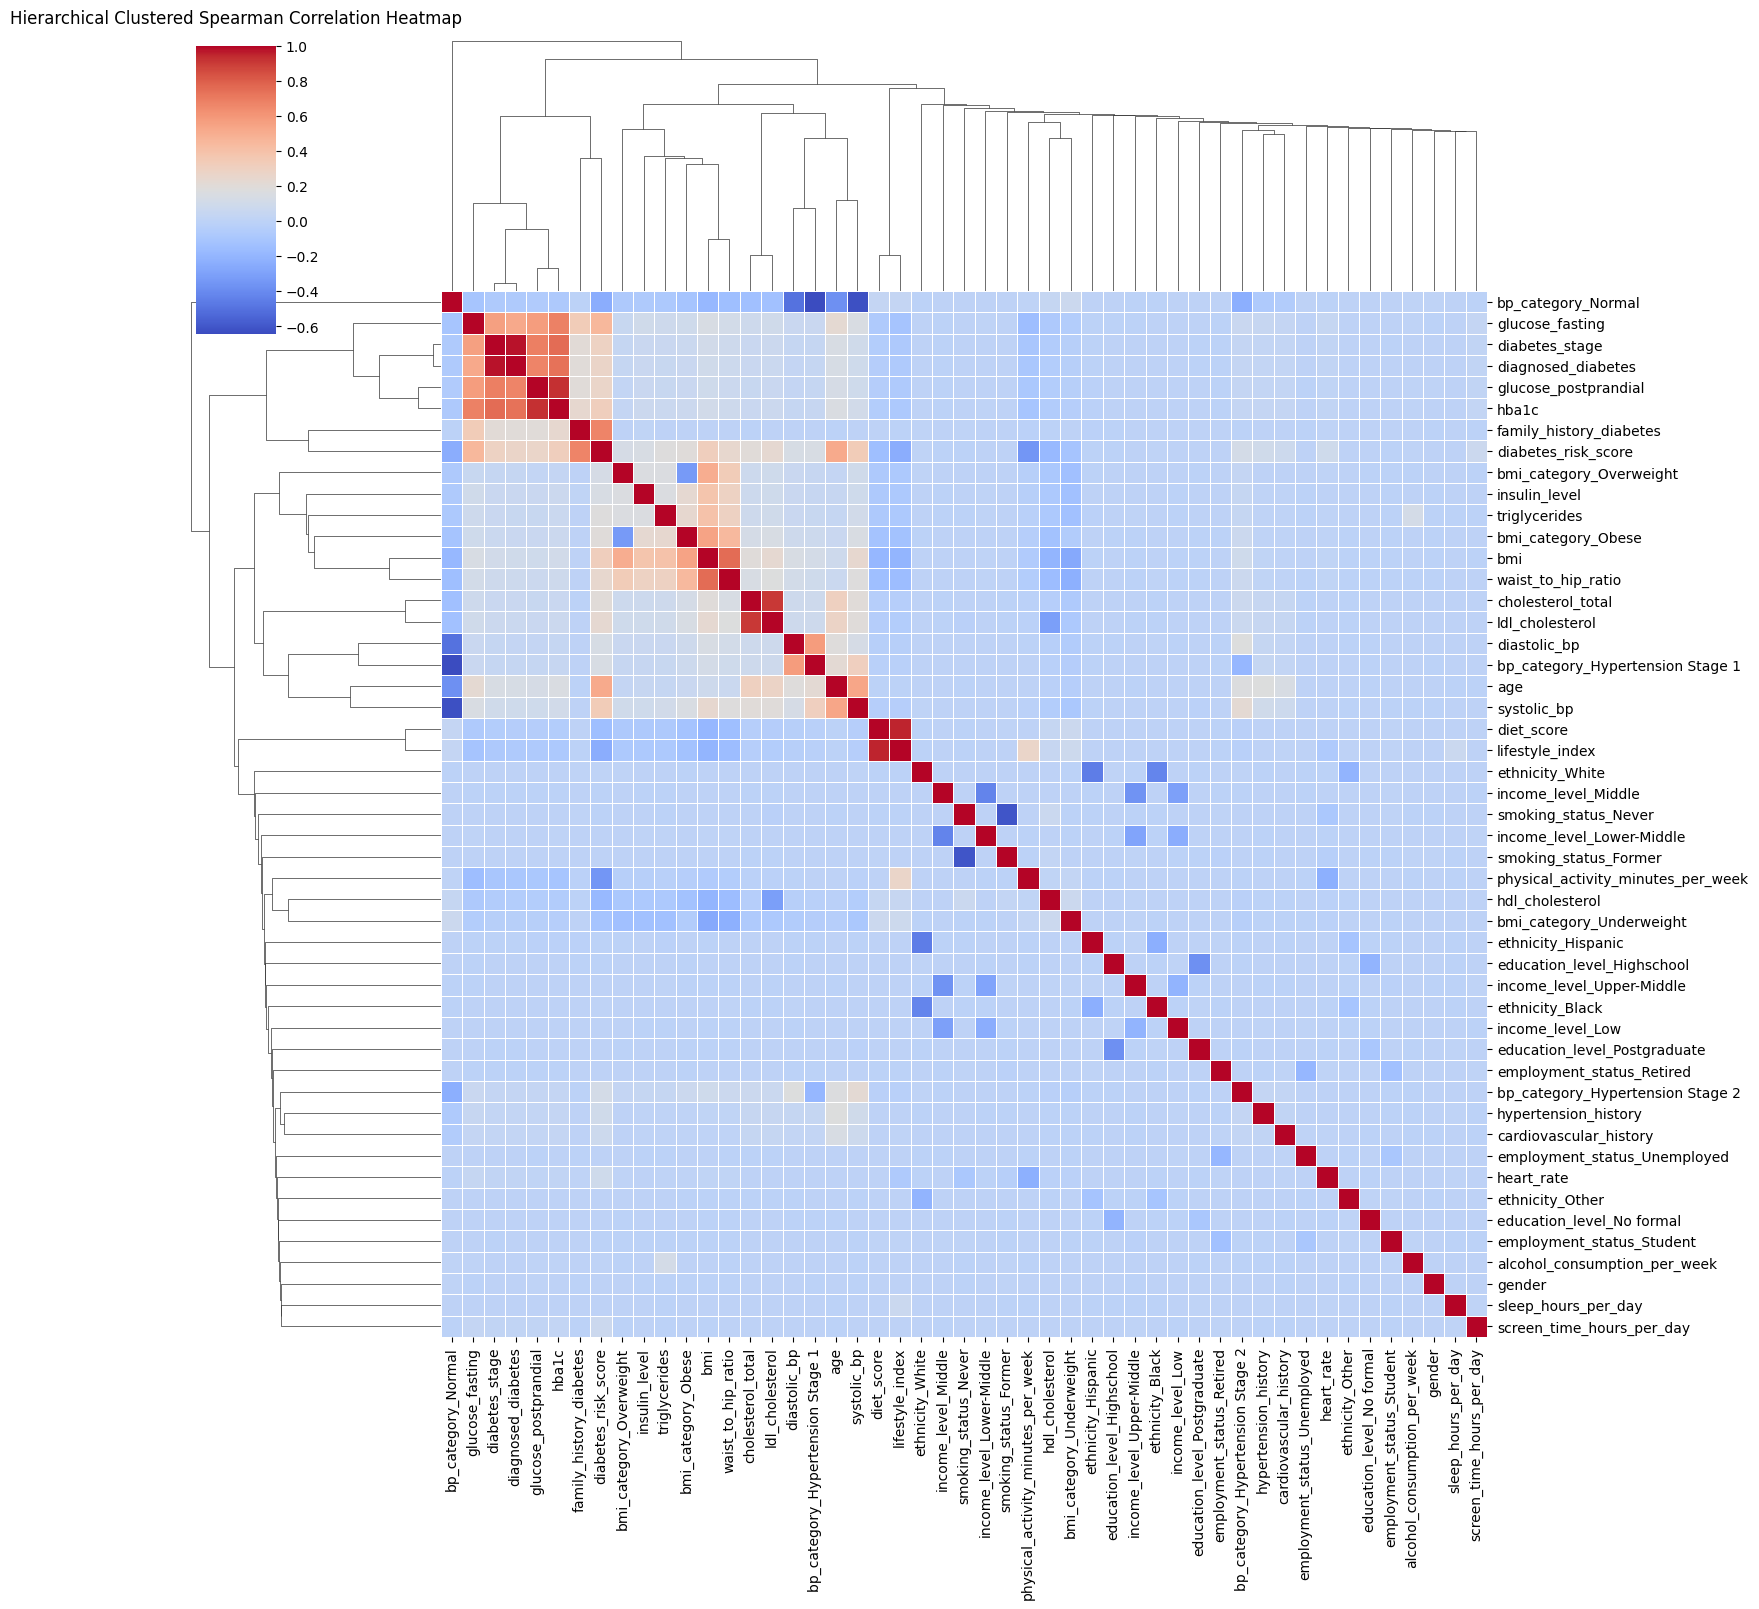

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Spearman correlation
corr = df.corr(method='spearman')

# Clustered heatmap
sns.clustermap(
    corr, 
    cmap='coolwarm', 
    figsize=(16,16),
    linewidths=0.5
)
plt.title("Hierarchical Clustered Spearman Correlation Heatmap", y=1.05)
plt.show()


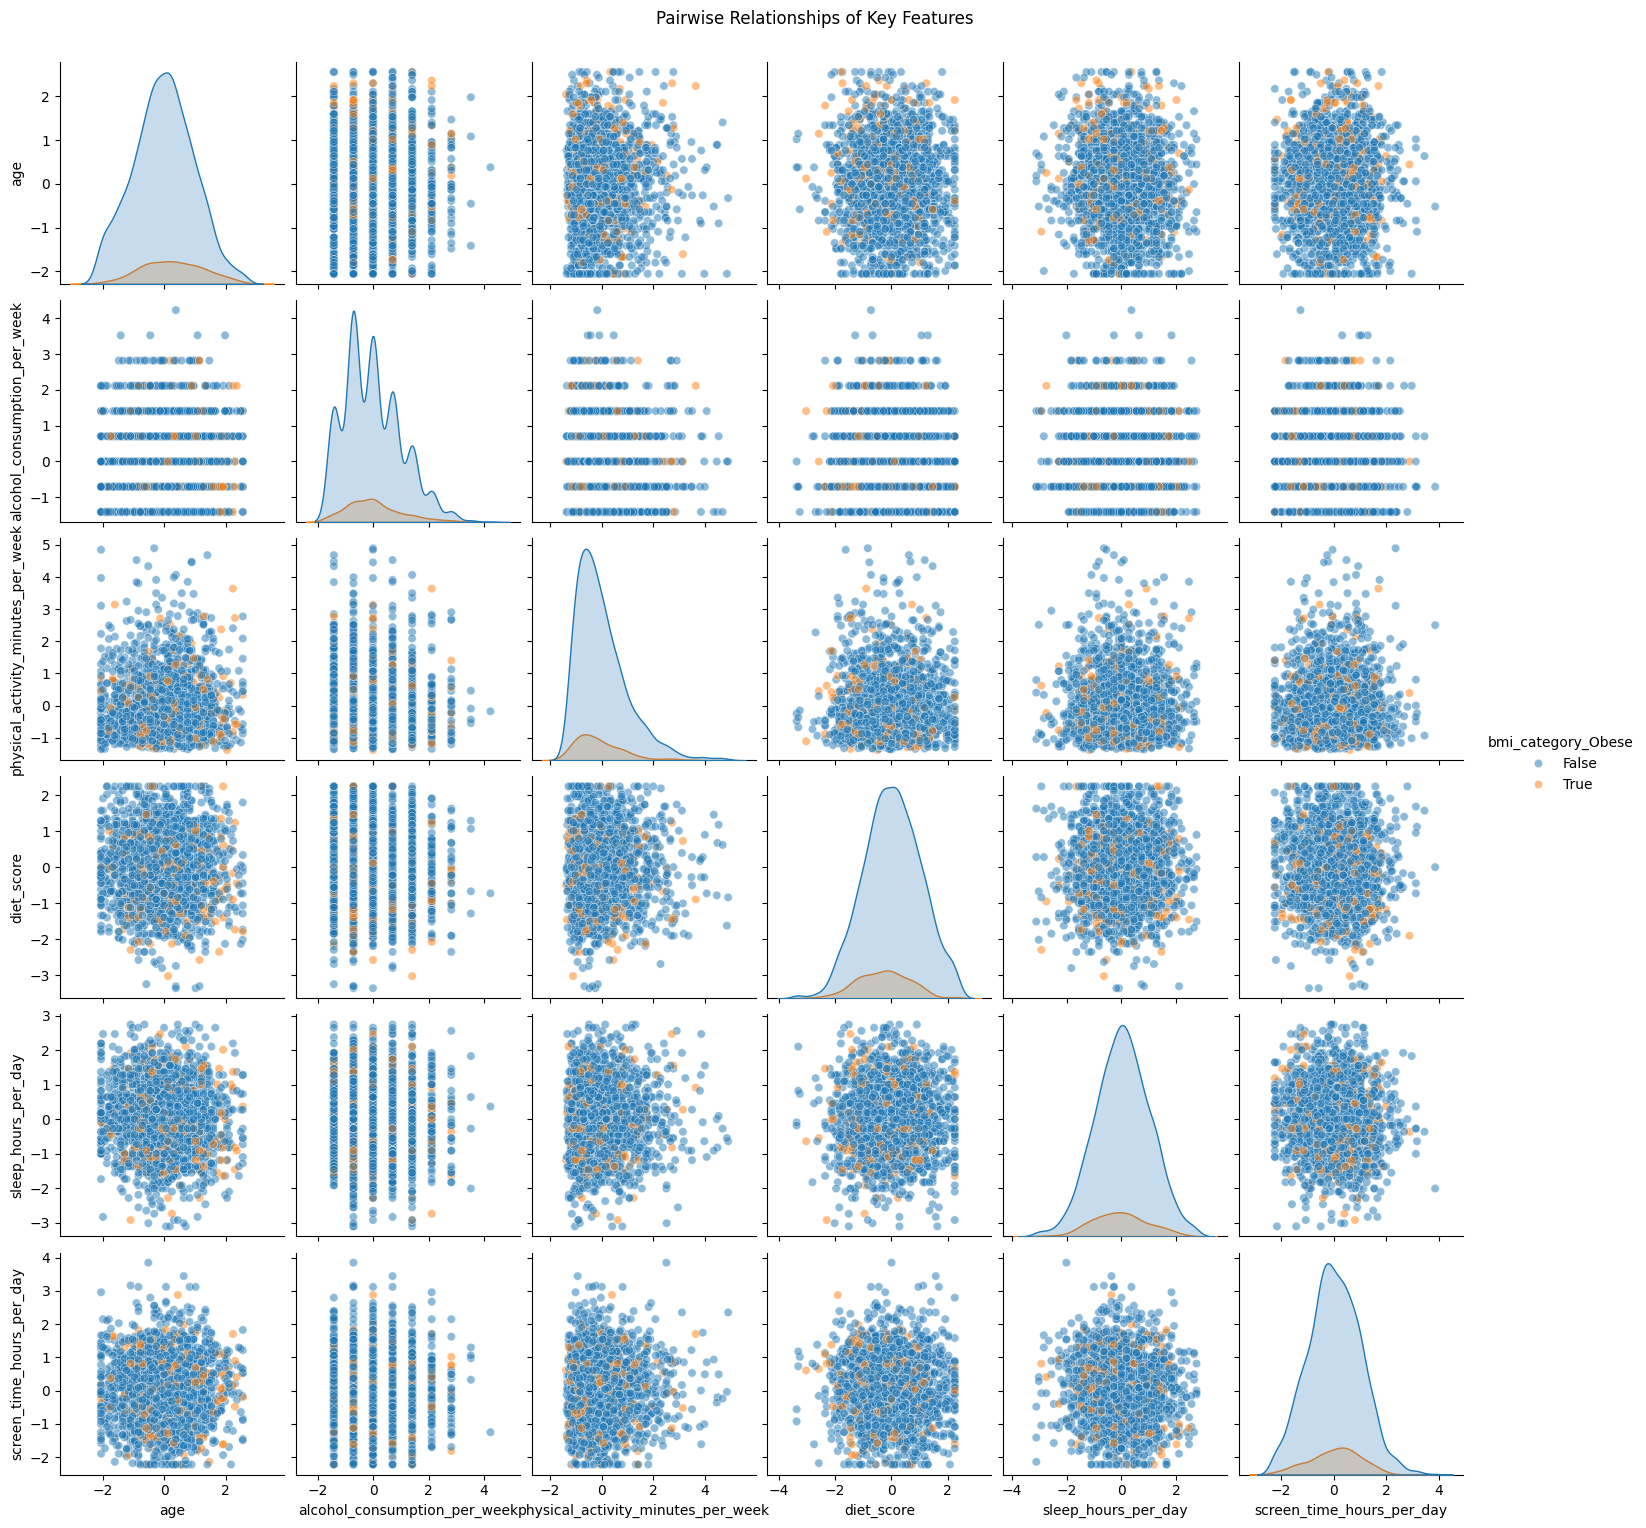

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select continuous features
continuous_features = [
    'age', 
    'alcohol_consumption_per_week', 
    'physical_activity_minutes_per_week', 
    'diet_score', 
    'sleep_hours_per_day', 
    'screen_time_hours_per_day'
]

# Sample for performance
sample_df = df.sample(n=2000, random_state=42)

# Pairplot colored by BMI category
sns.pairplot(
    sample_df, 
    vars=continuous_features, 
    hue='bmi_category_Obese',  # Change to any categorical outcome
    plot_kws={'alpha':0.5}
)
plt.suptitle("Pairwise Relationships of Key Features", y=1.02)
plt.show()


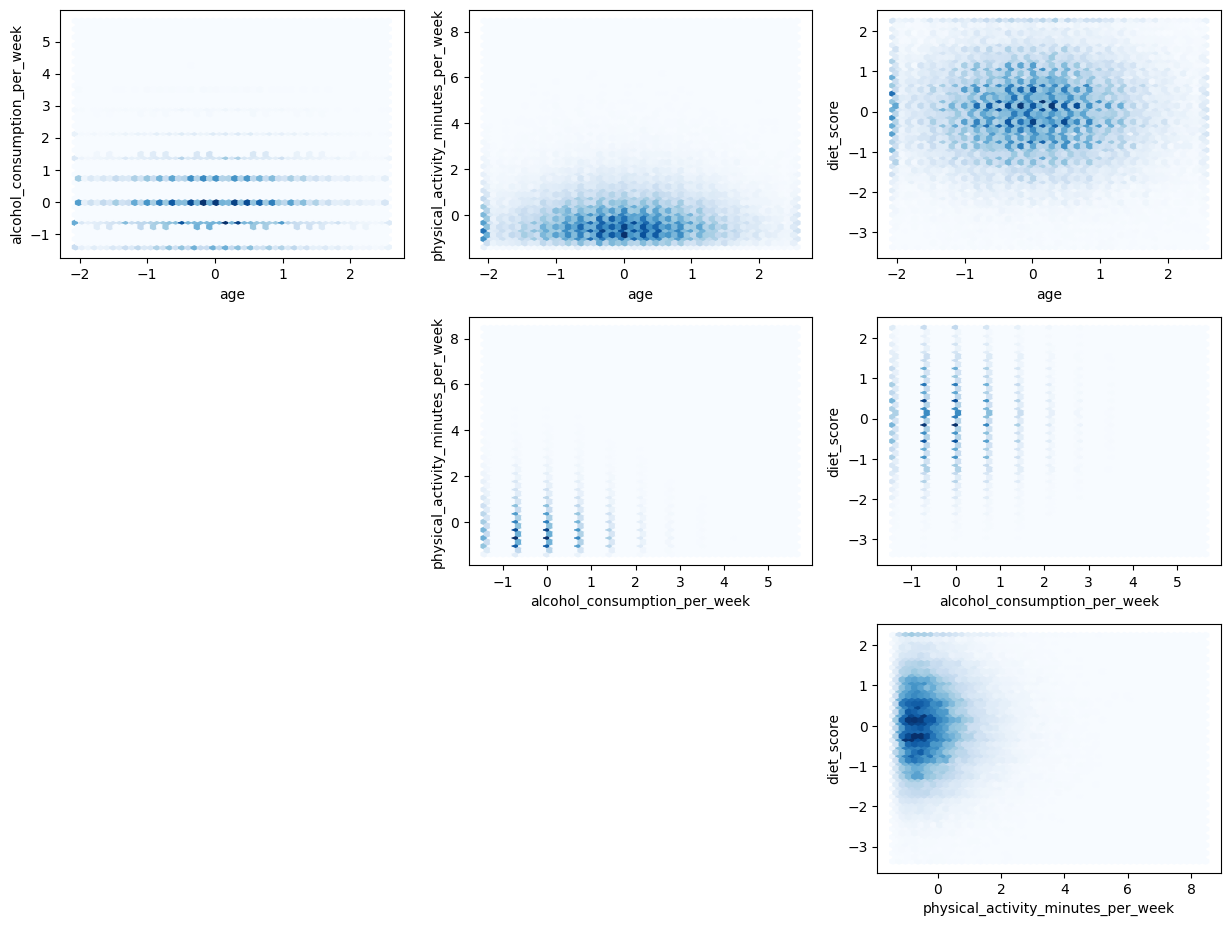

In [5]:
continuous_features = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score'
]

import matplotlib.pyplot as plt

# Hexbin plots for pairwise relationships
plt.figure(figsize=(16,12))

for i, x_col in enumerate(continuous_features):
    for j, y_col in enumerate(continuous_features):
        if i < j:
            plt.subplot(len(continuous_features), len(continuous_features), i*len(continuous_features)+j+1)
            plt.hexbin(df[x_col], df[y_col], gridsize=50, cmap='Blues')
            plt.xlabel(x_col)
            plt.ylabel(y_col)
plt.tight_layout()
plt.show()


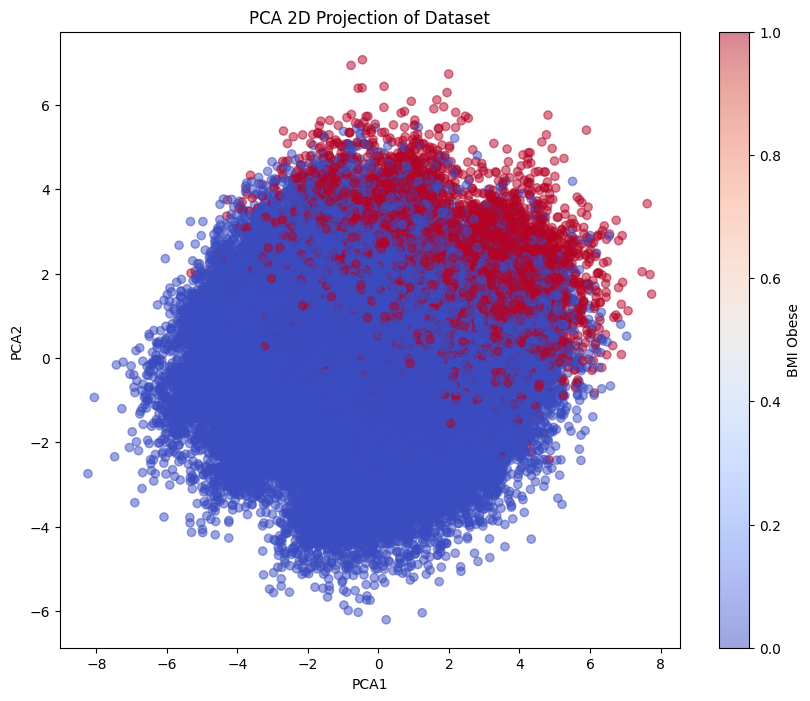

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Numeric features
numeric_df = df.select_dtypes(include='number')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot
plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0], pca_result[:,1], 
            c=df['bmi_category_Obese'].astype(int), cmap='coolwarm', alpha=0.5)
plt.colorbar(label='BMI Obese')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA 2D Projection of Dataset')
plt.show()


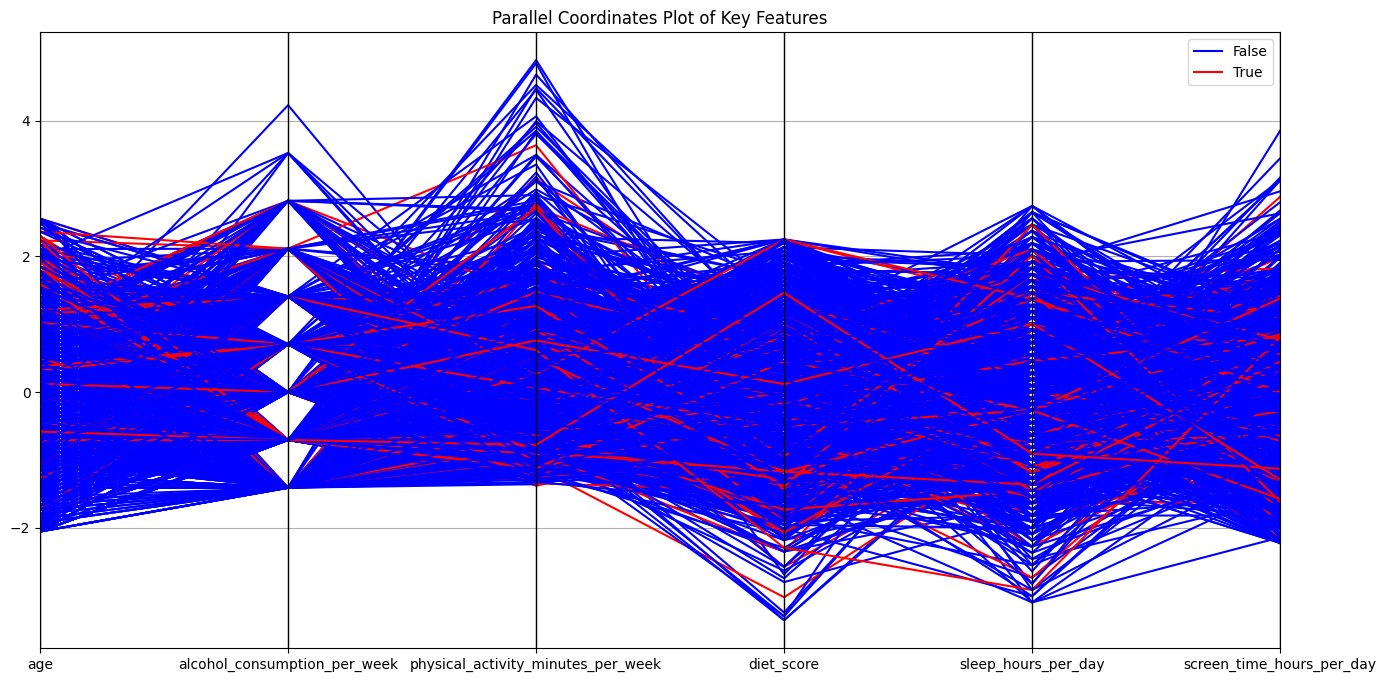

In [7]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Sample for readability
sample_df = df.sample(n=2000, random_state=42)

# Select features
features = [
    'age',
    'alcohol_consumption_per_week',
    'physical_activity_minutes_per_week',
    'diet_score',
    'sleep_hours_per_day',
    'screen_time_hours_per_day',
    'bmi_category_Obese'
]

plt.figure(figsize=(16,8))
# Specify colors: Blue for False, Red for True
parallel_coordinates(
    sample_df[features],
    class_column='bmi_category_Obese',
    color=['blue', 'red']
)
plt.title("Parallel Coordinates Plot of Key Features")
plt.show()


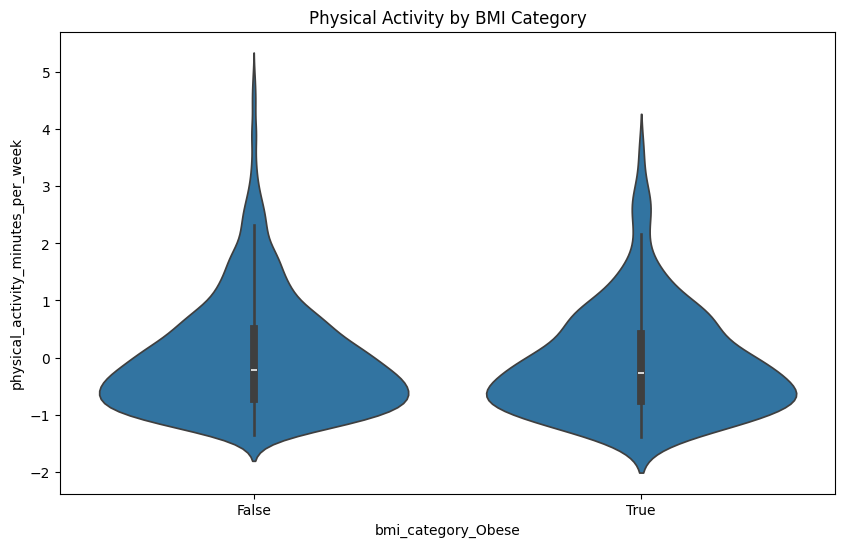

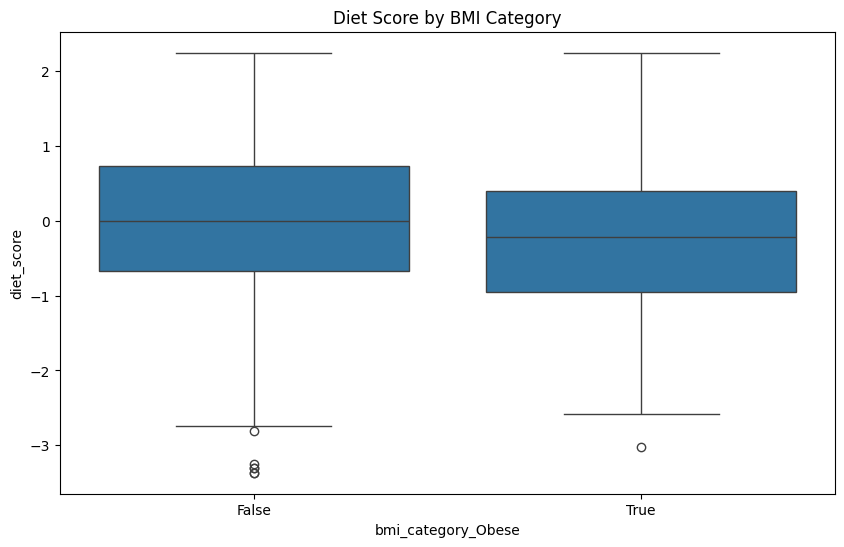

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample for performance
sample_df = df.sample(n=2000, random_state=42)

# Violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x='bmi_category_Obese', y='physical_activity_minutes_per_week', data=sample_df)
plt.title('Physical Activity by BMI Category')
plt.show()

# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='bmi_category_Obese', y='diet_score', data=sample_df)
plt.title('Diet Score by BMI Category')
plt.show()


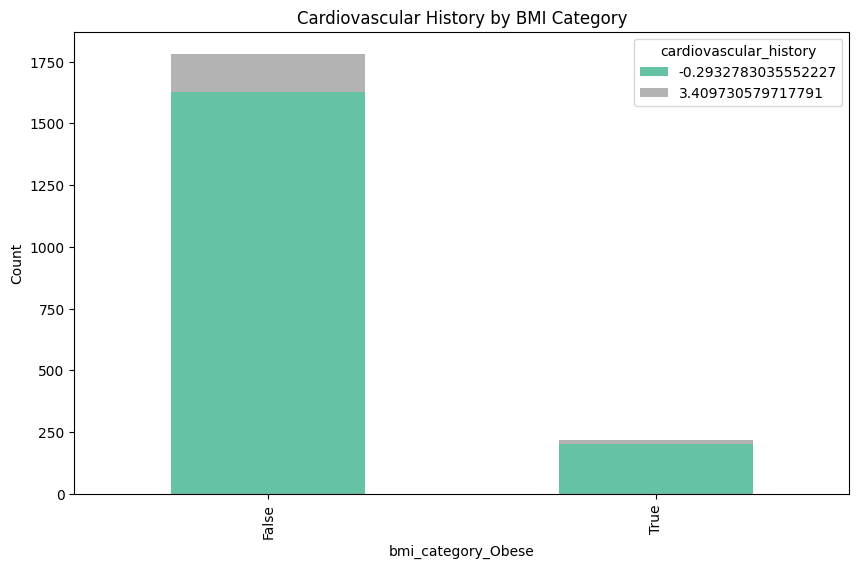

In [9]:
import matplotlib.pyplot as plt

# Count cardiovascular history by BMI
counts = pd.crosstab(sample_df['bmi_category_Obese'], sample_df['cardiovascular_history'])

counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Cardiovascular History by BMI Category')
plt.ylabel('Count')
plt.show()


In [10]:
import seaborn as sns

C:\Users\Legion\AppData\Local\Temp\ipykernel_11160\1253363254.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.histplot(


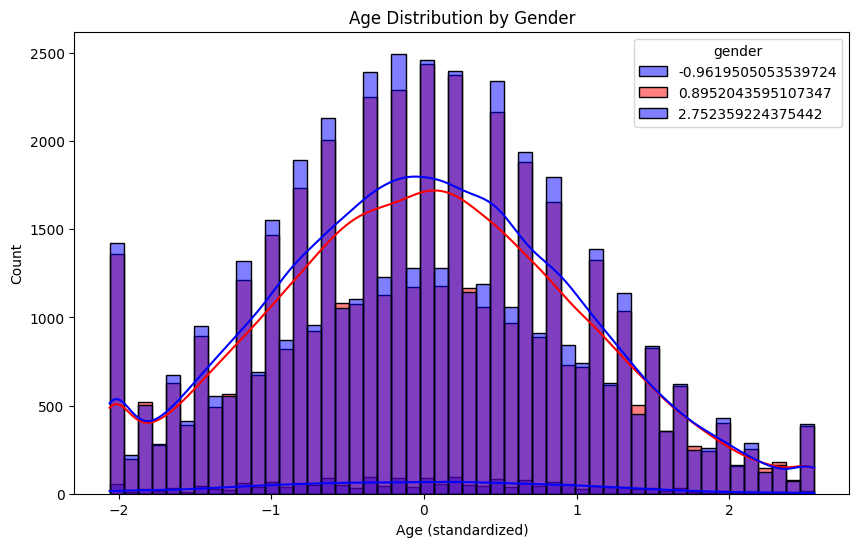

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='age',
    hue='gender',  # color by gender
    bins=50,
    kde=True,
    palette=['blue', 'red']
)
plt.title("Age Distribution by Gender")
plt.xlabel("Age (standardized)")
plt.ylabel("Count")
plt.show()


<Figure size 1000x600 with 0 Axes>

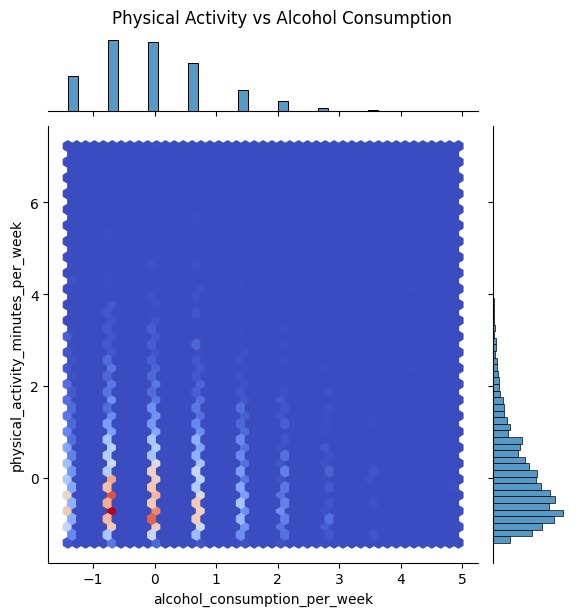

In [12]:
plt.figure(figsize=(10,6))
sns.jointplot(
    x='alcohol_consumption_per_week',
    y='physical_activity_minutes_per_week',
    data=df.sample(5000),  # sample for performance
    kind='hex',
    cmap='coolwarm'
)
plt.suptitle("Physical Activity vs Alcohol Consumption", y=1.02)
plt.show()


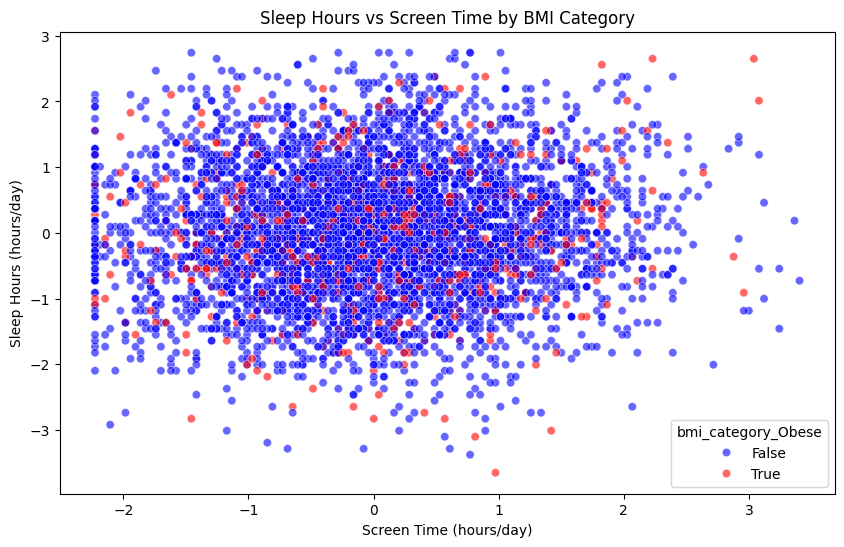

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='screen_time_hours_per_day',
    y='sleep_hours_per_day',
    hue='bmi_category_Obese',
    data=df.sample(5000),
    palette=['blue','red'],
    alpha=0.6
)
plt.title("Sleep Hours vs Screen Time by BMI Category")
plt.xlabel("Screen Time (hours/day)")
plt.ylabel("Sleep Hours (hours/day)")
plt.show()


C:\Users\Legion\AppData\Local\Temp\ipykernel_11160\3101539832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


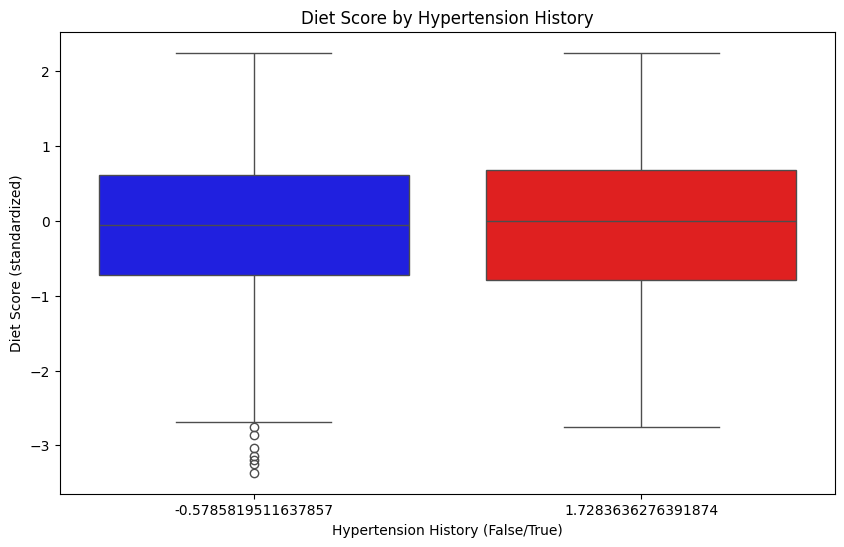

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='hypertension_history',
    y='diet_score',
    data=df.sample(2000),
    palette=['blue','red']
)
plt.title("Diet Score by Hypertension History")
plt.xlabel("Hypertension History (False/True)")
plt.ylabel("Diet Score (standardized)")
plt.show()


<Figure size 1000x600 with 0 Axes>

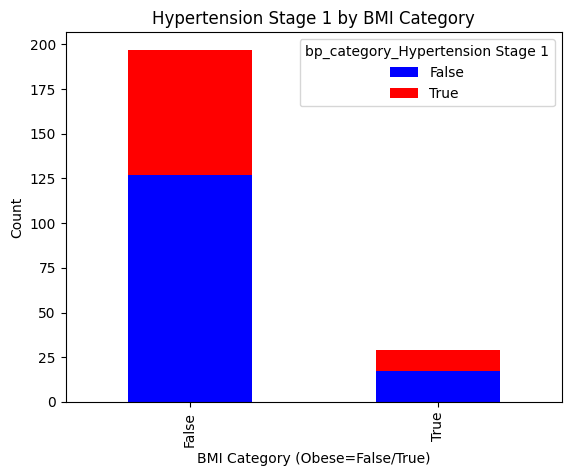

In [15]:
plt.figure(figsize=(10,6))
counts = pd.crosstab(df.sample(5000)['bmi_category_Obese'], df.sample(5000)['bp_category_Hypertension Stage 1'])
counts.plot(kind='bar', stacked=True, color=['blue','red'])
plt.title("Hypertension Stage 1 by BMI Category")
plt.ylabel("Count")
plt.xlabel("BMI Category (Obese=False/True)")
plt.show()


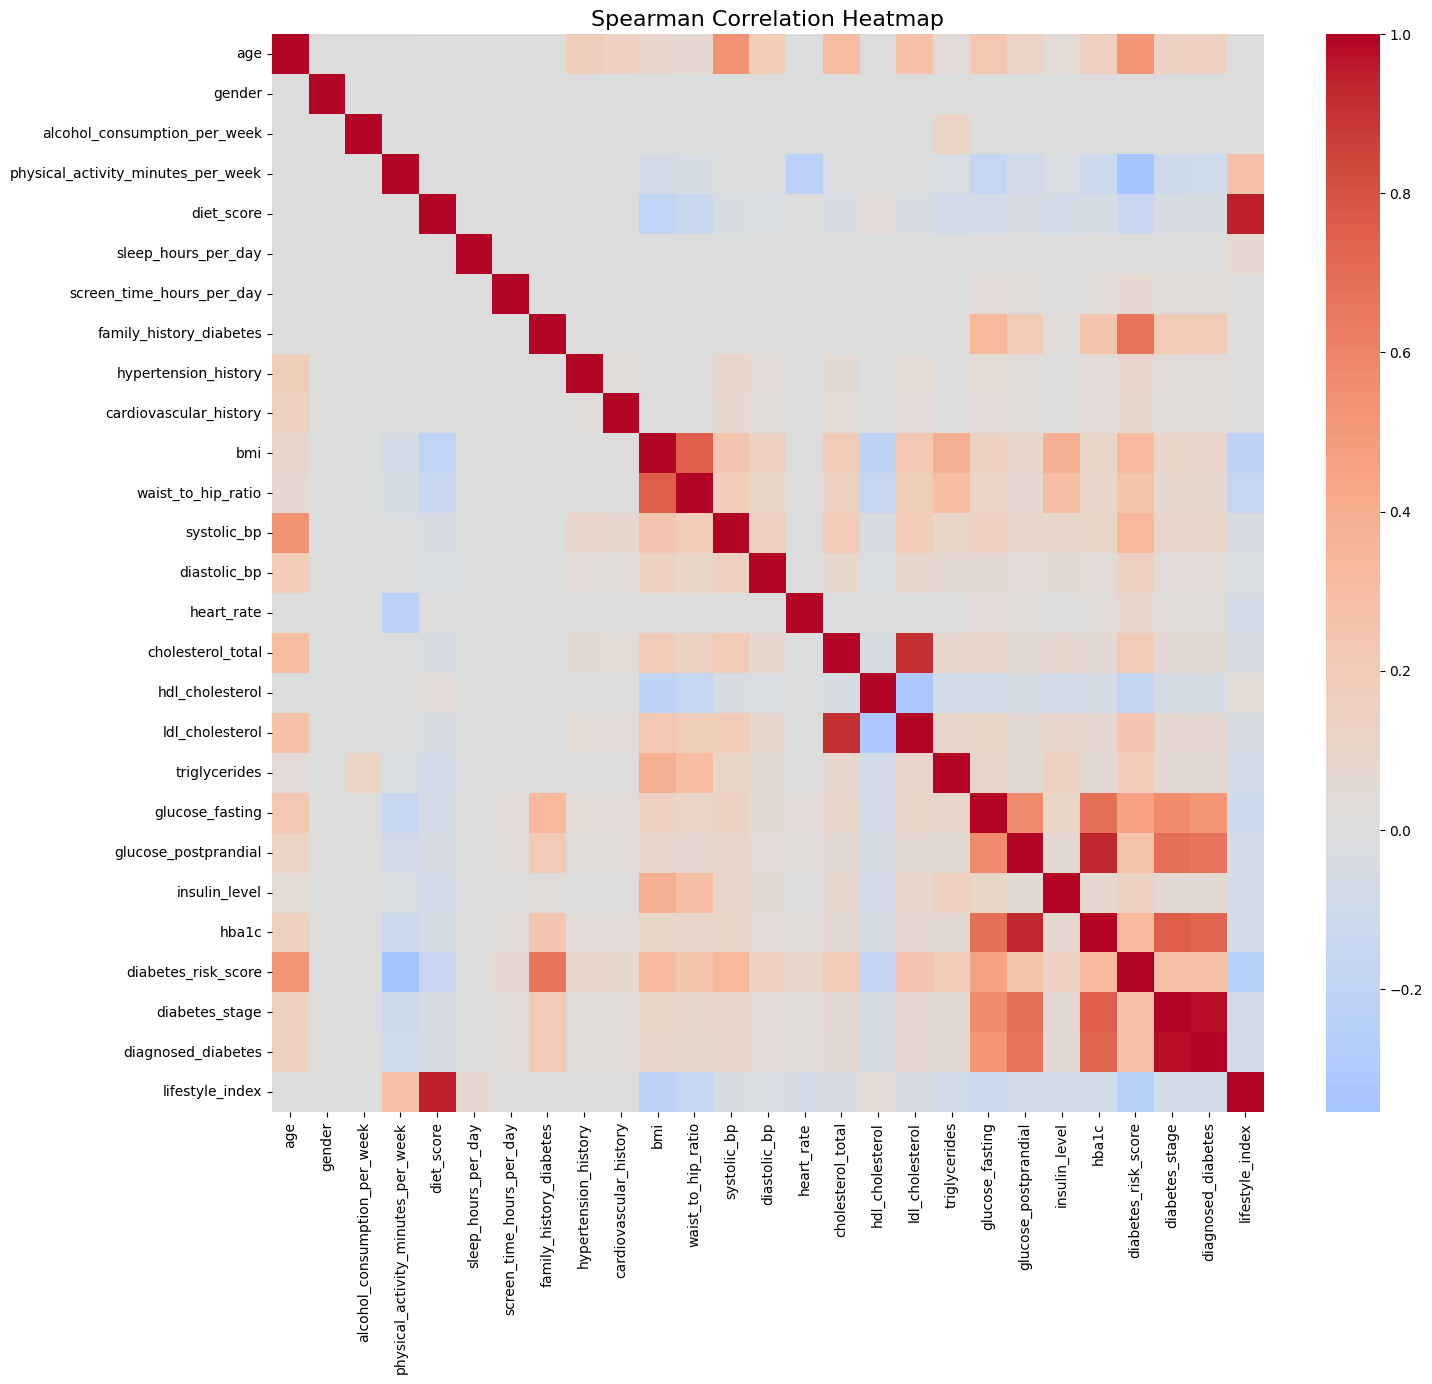

In [16]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Spearman correlation
corr = df[numeric_cols].corr(method='spearman')

plt.figure(figsize=(16,14))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Spearman Correlation Heatmap", fontsize=16)
plt.show()


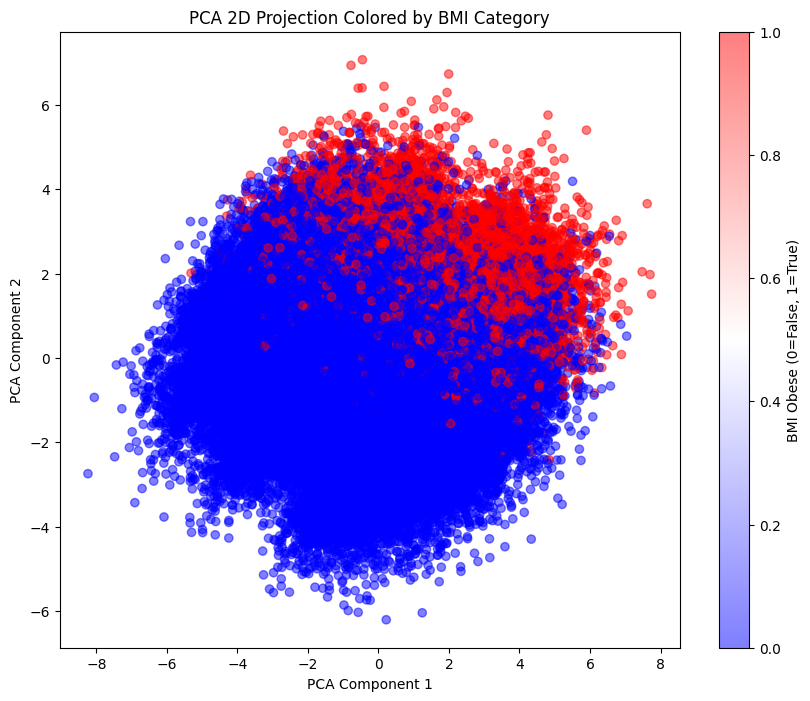

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot
plt.figure(figsize=(10,8))
plt.scatter(
    pca_result[:,0], 
    pca_result[:,1], 
    c=df['bmi_category_Obese'].astype(int), 
    cmap='bwr', 
    alpha=0.5
)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA 2D Projection Colored by BMI Category")
plt.colorbar(label='BMI Obese (0=False, 1=True)')
plt.show()


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r'Process_data\diabetes_final_standardized.csv')

# Numeric features (include bool types for correlation calculation)
numeric_df = df.select_dtypes(include=['number', 'bool'])

# Compute correlation with target (BMI Obese as example)
correlations = numeric_df.corr()['bmi_category_Obese'].abs().sort_values(ascending=False)
main_features = correlations.index[1:6]  # top 5 features excluding target
main_features


Index(['bmi', 'waist_to_hip_ratio', 'bmi_category_Overweight', 'triglycerides',
       'insulin_level'],
      dtype='object')

This plots show the most important feature against BMI Obese with a linear regression line.

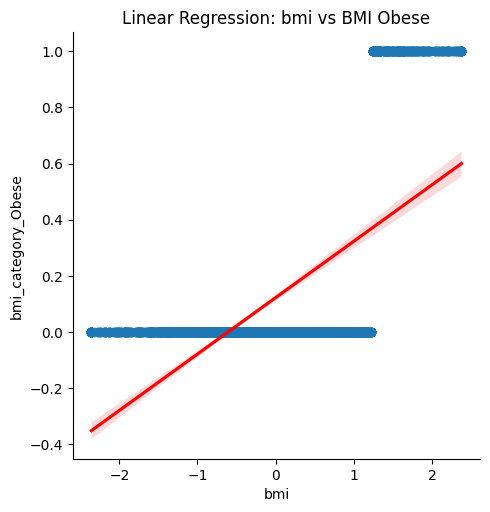

In [20]:
import seaborn as sns

# Visualize linear regression of the top feature vs BMI
sns.lmplot(x=main_features[0], y='bmi_category_Obese', data=df.sample(2000), line_kws={'color':'red'})
plt.title(f"Linear Regression: {main_features[0]} vs BMI Obese")
plt.show()


Show All Top Features with Linear Regression in a Loop

Automatically finds the most relevant features using correlation.

Uses linear regression to show trend lines for main predictors.

Works with large datasets via sampling.

Simple, clear, and visual interpretation of key relationships.

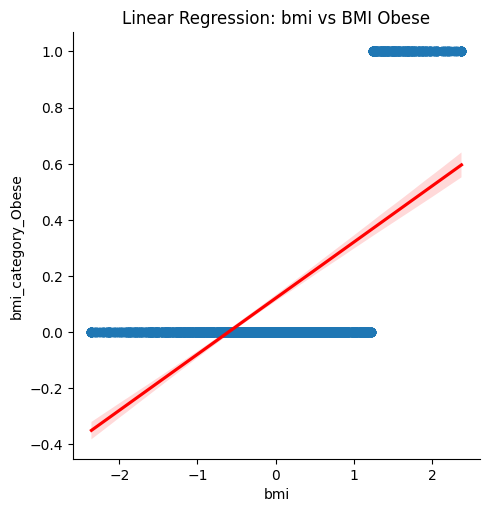

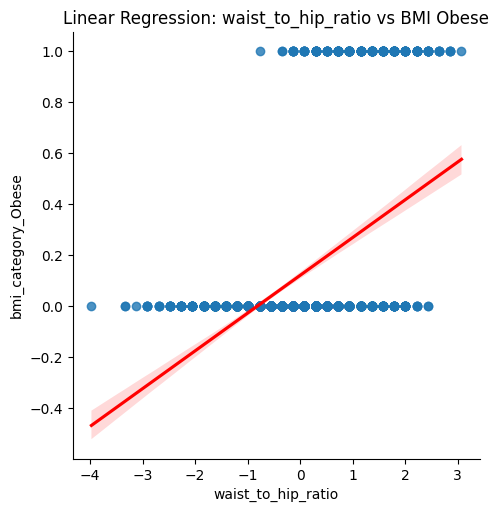

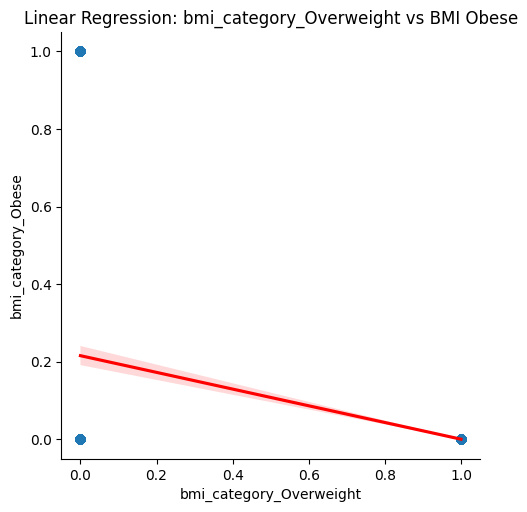

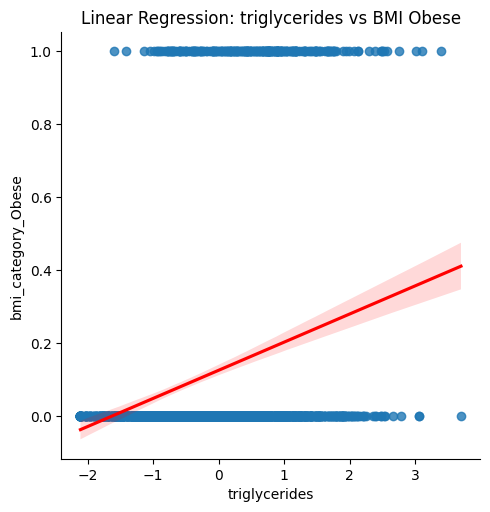

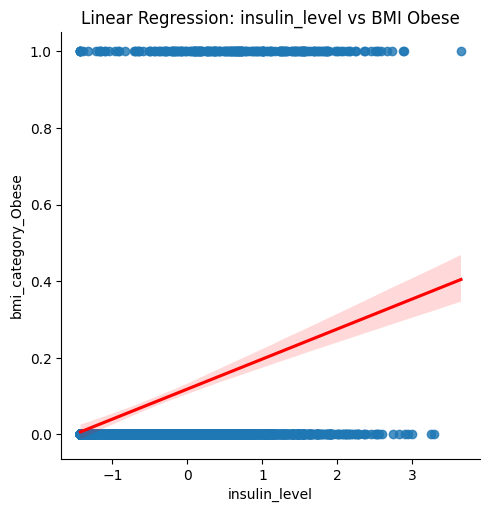

In [21]:
for feature in main_features:
    sns.lmplot(x=feature, y='bmi_category_Obese', data=df.sample(2000), line_kws={'color':'red'})
    plt.title(f"Linear Regression: {feature} vs BMI Obese")
    plt.show()
